<center><h1>Feature Extraction and EDA of Spotify Tracks</h1></center>

<h2>Importing Libraries</h2>

In [37]:
# Feature Extraction
import spotipy # Spotify web API wrapper for python
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyOAuth # Auth
from spotipy.oauth2 import SpotifyClientCredentials # Auth
import pandas as pd # Dataframe
import numpy as np 
import time # Pause execution of loops
import json # To read json files
from tqdm import tqdm # to show progress bar of for loops

# EDA 
import matplotlib.pyplot as plt # import matplotlib.pyplot and make plots appear inline for visualizations
%matplotlib inline
import seaborn as sns # import seaborn
from sklearn.linear_model import LinearRegression # Import the linear model function from sklearn
from sklearn.preprocessing import StandardScaler # Standardize feature columns
from sklearn.decomposition import PCA # Import the PCA class function from sklearn
from sklearn.cluster import KMeans # Import KMeans from sklearn

<h2>Read Json Files</h2>

In [16]:
with open('mpd.slice.0-999.json', 'r') as f1:
    jsonData1 = json.load(f1)

with open('mpd.slice.1000-1999.json', 'r') as f2:
    jsonData2 = json.load(f2)

with open('mpd.slice.2000-2999.json', 'r') as f3:
    jsonData3 = json.load(f3)
    
with open('mpd.slice.3000-3999.json', 'r') as f4:
    jsonData4 = json.load(f4)

<h2>Perform Feature Extraction using Spotipy library</h2>

In [17]:
# To access spotify APIs we have to create an app with a given id & secret key

auth_manager = SpotifyClientCredentials(client_id="3225f99ccea44e1292130efa208b4a5e",
                                       client_secret="6b14149eff614bf0b0eb61187833e5a0")
sp = spotipy.Spotify(auth_manager=auth_manager)

In [18]:
# First we will have to get all the track, artist, album IDs

def getIDs(data):
    track_ids = []
    artist_ids = []
    album_ids = []
    for i in tqdm(range(len(data["playlists"]))):
        playlist = data["playlists"][i]
        for track in playlist["tracks"]:
            track_ids.append(track["track_uri"])
            album_ids.append(track["album_uri"])
            artist_ids.append(track["artist_uri"])
    return track_ids, artist_ids, album_ids

In [19]:
trackID, artistID, albumID = getIDs(jsonData1)
trackID2, artistID2, albumID2 = getIDs(jsonData2)
trackID3, artistID3, albumID3 = getIDs(jsonData3)

trackID.extend(trackID2)
trackID.extend(trackID3)

artistID.extend(artistID2)
artistID.extend(artistID3)

albumID.extend(albumID2)
albumID.extend(albumID3)

100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 35673.43it/s]


In [20]:
# We have to get the track feature which corresponds to the track id

def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    
# Track info
    track = track_info['name']
    album = track_info['album']['name']
    artist = track_info['album']['artists'][0]['name']
    release_date = track_info['album']['release_date']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    
# Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    valence = features_info[0]['valence']
    time_signature = features_info[0]['time_signature']
    
    track_data = [track, album, artist, release_date, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, time_signature]
    
    return track_data

In [21]:
# We have to get the artist info which corresponds to the artist uri

def getArtistInfo(id):
    artist_info = sp.artist(id)
    
# Artist info
    followers = artist_info["followers"]['total']
    artist_popularity = artist_info["popularity"]
    
    if len(artist_info['genres']) == 1:
        artist_genre1 = artist_info["genres"][0]
        artist_genre2 = None
        artist_genre3 = None
    elif len(artist_info['genres']) == 2:
        artist_genre1 = artist_info["genres"][0]
        artist_genre2 = artist_info["genres"][1]
        artist_genre3 = None
    elif len(artist_info['genres']) == 3:
        artist_genre1 = artist_info["genres"][0]
        artist_genre2 = artist_info["genres"][1]
        artist_genre3 = artist_info["genres"][2]
    else:
        artist_genre1 = None
        artist_genre2 = None
        artist_genre3 = None
 
    
    artist_data = [followers, artist_popularity, artist_genre1, artist_genre2, artist_genre3] 
    
    return artist_data

In [22]:
# We have to get the album info which corresponds to the album uri

def getAlbumInfo(id):
    album_info = sp.album(id)
    
# Album info
    album_label = album_info["label"]
    album_popularity = album_info["popularity"]
    
    album_data = [album_label, album_popularity] 
    
    return album_data

In [23]:
# trackFeatures = []
# artistInfo = []
# albumInfo = []
# # Slice the first 699 record as a sample of our 190,000 record
# for i in tqdm(range(len(trackID[0:699]))):
#     time.sleep(.3)
#     featuresData = getTrackFeatures(trackID[i])
#     artistData = getArtistInfo(artistID[i])
#     albumData = getAlbumInfo(albumID[i])
    
#     trackFeatures.append(featuresData)
#     artistInfo.append(artistData)
#     albumInfo.append(albumData)
    
# df_features = pd.DataFrame(trackFeatures[0:699], columns = ["Track", "Album", "Artist", "Release Date", "Length", "Popularity", "Acousticness", "Danceability", "Energy", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Tempo", "Valence", "Time Signature"])
# df_track_uri = pd.DataFrame(trackID[0:699], columns = ["Track URI"])
# df_artist_uri = pd.DataFrame(artistID[0:699], columns = ["Artist URI"])
# df_artist_info = pd.DataFrame(artistInfo[0:699], columns = ["Artist Followers", "Artist Popularity", "Artist Genre 1", "Artist Genre 2", "Artist Genre 3"])
# df_album_uri = pd.DataFrame(albumID[0:699], columns = ["Album URI"])
# df_album_info = pd.DataFrame(albumInfo[0:699], columns = ["Album Label", "Album Popularity"])

# df = pd.concat([df_features, df_track_uri, df_artist_uri, df_album_uri, df_artist_info, df_album_info], axis=1)

  0%|                                                                                          | 0/699 [00:00<?, ?it/s]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
  0%|                                                                                  | 1/699 [00:01<18:41,  1.61s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
Couldn't read cache at: .cache
Couldn't write token to cache at: .cache
  0%|▏                                                                                 | 2/699 [00:02<15:33,  1.34s/it]Couldn't read cache at: .cache
Couldn't write token to cache at: .c

In [27]:
df

,Track,Album,Artist,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,...,Track URI,Artist URI,Album URI,Artist Followers,Artist Popularity,Artist Genre 1,Artist Genre 2,Artist Genre 3,Album Label,Album Popularity
0,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,Missy Elliott,2005-07-04,226863,67,0.03110,0.904,0.813,0.006970,...,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,2029676,70,None,None,None,Atlantic Records/ATG,53
1,Toxic,In The Zone,Britney Spears,2003-11-13,198800,81,0.02490,0.774,0.838,0.025000,...,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,11268141,78,dance pop,pop,post-teen pop,Jive,68
2,Crazy In Love (feat. Jay-Z),Dangerously In Love (Alben für die Ewigkeit),Beyoncé,2003-06-23,235933,21,0.00238,0.664,0.758,0.000000,...,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,spotify:album:25hVFAxTlDvXbx2X2QkUkE,32129551,89,dance pop,pop,r&b,Columbia,11
3,Rock Your Body,Justified,Justin Timberlake,2002-11-04,267266,76,0.20100,0.892,0.714,0.000234,...,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,spotify:album:6QPkyl04rXwTGlGlcYaRoW,12462149,79,dance pop,pop,None,Jive,67
4,It Wasn't Me,Hot Shot (International Version #2),Shaggy,2000,227600,0,0.05610,0.853,0.606,0.000000,...,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,spotify:album:6NmFmPX56pcLBOFMhIiKvF,1782275,72,pop rap,reggae fusion,None,Geffen,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,Kimmi In a Rice Field - Balam Acab remix,Kimmi In a Rice Field / Bad Street Remixes,Mr Twin Sister,2011-12-12,199333,8,0.37800,0.559,0.552,0.747000,...,spotify:track:30bZbp1JbPVXhidkCm3ceh,spotify:artist:5ltJZgIW3OkY5WvuzX5MYz,spotify:album:2UxBszSlzvUvkCVVjhoxC4,82604,43,art pop,chillwave,None,Domino Recording Co,2
695,Maximalist,Cerulean,Baths,2010-06-07,199680,0,0.00124,0.761,0.715,0.409000,...,spotify:track:147IpzivIvsYHkYS4nq2tK,spotify:artist:5zS8r5hRRk1jzD41yYS1NO,spotify:album:2Dt2BZKqxIM5b8hdfmPlP7,153353,39,chillwave,None,None,Anticon,0
696,Building Steam With A Grain Of Salt,Endtroducing.....,DJ Shadow,1996-09-16,399026,0,0.44200,0.614,0.833,0.934000,...,spotify:track:6iugUJxw11T9vfOehIzBvF,spotify:artist:5CE2IfdYZEQGIDsfiRm8SI,spotify:album:7N0W5QxnRMP3s1mMxfQo1p,530248,60,None,None,None,Universal Music Group,0
697,The Garden,The Audience's Listening (U.S. Version),Cut Chemist,2006-07-10,375546,43,0.05350,0.727,0.831,0.132000,...,spotify:track:5Tp97LcL45G82uC6vaLvt5,spotify:artist:4743DlrFCsAlAV4N26Kdgh,spotify:album:51eBQ2u5LInHRAicVdekxi,80844,40,None,None,None,Warner Records,36


<h2>Save data into CSV File</h2>

In [26]:
df.to_csv('spotify_data_sample.csv', sep = ',')

<hr>

<h2> Perfom EDA on the extracted data </h2>

In [28]:
df.head()

,Track,Album,Artist,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,...,Track URI,Artist URI,Album URI,Artist Followers,Artist Popularity,Artist Genre 1,Artist Genre 2,Artist Genre 3,Album Label,Album Popularity
0,Lose Control (feat. Ciara & Fat Man Scoop),The Cookbook,Missy Elliott,2005-07-04,226863,67,0.03110,0.904,0.813,0.006970,...,spotify:track:0UaMYEvWZi0ZqiDOoHU3YI,spotify:artist:2wIVse2owClT7go1WT98tk,spotify:album:6vV5UrXcfyQD1wu4Qo2I9K,2029676,70,None,None,None,Atlantic Records/ATG,53
1,Toxic,In The Zone,Britney Spears,2003-11-13,198800,81,0.02490,0.774,0.838,0.025000,...,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,spotify:artist:26dSoYclwsYLMAKD3tpOr4,spotify:album:0z7pVBGOD7HCIB7S8eLkLI,11268141,78,dance pop,pop,post-teen pop,Jive,68
2,Crazy In Love (feat. Jay-Z),Dangerously In Love (Alben für die Ewigkeit),Beyoncé,2003-06-23,235933,21,0.00238,0.664,0.758,0.000000,...,spotify:track:0WqIKmW4BTrj3eJFmnCKMv,spotify:artist:6vWDO969PvNqNYHIOW5v0m,spotify:album:25hVFAxTlDvXbx2X2QkUkE,32129551,89,dance pop,pop,r&b,Columbia,11
3,Rock Your Body,Justified,Justin Timberlake,2002-11-04,267266,76,0.20100,0.892,0.714,0.000234,...,spotify:track:1AWQoqb9bSvzTjaLralEkT,spotify:artist:31TPClRtHm23RisEBtV3X7,spotify:album:6QPkyl04rXwTGlGlcYaRoW,12462149,79,dance pop,pop,None,Jive,67
4,It Wasn't Me,Hot Shot (International Version #2),Shaggy,2000,227600,0,0.05610,0.853,0.606,0.000000,...,spotify:track:1lzr43nnXAijIGYnCT8M8H,spotify:artist:5EvFsr3kj42KNv97ZEnqij,spotify:album:6NmFmPX56pcLBOFMhIiKvF,1782275,72,pop rap,reggae fusion,None,Geffen,0


In [41]:
df.describe()

,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Time Signature,Artist Followers,Artist Popularity,Album Popularity
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,6.990000e+02,699.000000,699.000000
mean,237797.157368,31.949928,0.210598,0.611243,0.658290,0.113325,0.183975,-7.325984,0.087708,122.673325,0.504775,3.954220,5.534989e+06,60.636624,29.207439
std,65742.879605,29.577232,0.256515,0.161400,0.194409,0.255748,0.140250,3.335411,0.091937,28.795046,0.229486,0.304068,1.172178e+07,18.277145,27.288675
min,65306.000000,0.000000,0.000010,0.084900,0.013400,0.000000,0.023200,-29.917000,0.023200,48.973000,0.031100,1.000000,0.000000e+00,0.000000,0.000000
25%,200264.500000,0.000000,0.017300,0.507000,0.530000,0.000000,0.092450,-9.039500,0.035000,100.008000,0.337000,4.000000,2.048840e+05,50.000000,0.000000
50%,229040.000000,33.000000,0.086700,0.625000,0.681000,0.000057,0.129000,-6.723000,0.049100,120.419000,0.512000,4.000000,1.104524e+06,62.000000,29.000000
75%,266193.000000,60.000000,0.331500,0.727000,0.816500,0.018200,0.242000,-4.977000,0.092950,140.791000,0.686500,4.000000,4.988844e+06,74.000000,56.000000
max,658986.000000,84.000000,0.989000,0.979000,0.986000,0.991000,0.914000,-1.029000,0.563000,210.857000,0.972000,5.000000,1.015897e+08,95.000000,77.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Track              699 non-null    object 
 1   Album              699 non-null    object 
 2   Artist             699 non-null    object 
 3   Release Date       699 non-null    object 
 4   Length             699 non-null    int64  
 5   Popularity         699 non-null    int64  
 6   Acousticness       699 non-null    float64
 7   Danceability       699 non-null    float64
 8   Energy             699 non-null    float64
 9   Instrumentalness   699 non-null    float64
 10  Liveness           699 non-null    float64
 11  Loudness           699 non-null    float64
 12  Speechiness        699 non-null    float64
 13  Tempo              699 non-null    float64
 14  Valence            699 non-null    float64
 15  Time Signature     699 non-null    int64  
 16  Track URI          699 non

In [36]:
features = df[["Album Popularity", "Artist Followers", "Artist Popularity", "Artist Genre 1", "Artist Genre 2", "Artist Genre 3", "Release Date", "Length", "Popularity", "Acousticness", "Danceability", "Energy", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Tempo", "Valence", "Time Signature"]]
features

,Album Popularity,Artist Followers,Artist Popularity,Artist Genre 1,Artist Genre 2,Artist Genre 3,Release Date,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Time Signature
0,53,2029676,70,None,None,None,2005-07-04,226863,67,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,0.810,4
1,68,11268141,78,dance pop,pop,post-teen pop,2003-11-13,198800,81,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,0.924,4
2,11,32129551,89,dance pop,pop,r&b,2003-06-23,235933,21,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,0.701,4
3,67,12462149,79,dance pop,pop,None,2002-11-04,267266,76,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,0.817,4
4,0,1782275,72,pop rap,reggae fusion,None,2000,227600,0,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,0.654,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
694,2,82604,43,art pop,chillwave,None,2011-12-12,199333,8,0.37800,0.559,0.552,0.747000,0.1350,-11.645,0.0398,121.994,0.311,4
695,0,153353,39,chillwave,None,None,2010-06-07,199680,0,0.00124,0.761,0.715,0.409000,0.1240,-7.520,0.2330,94.989,0.366,4
696,0,530248,60,None,None,None,1996-09-16,399026,0,0.44200,0.614,0.833,0.934000,0.0923,-9.209,0.0297,164.717,0.469,4
697,36,80844,40,None,None,None,2006-07-10,375546,43,0.05350,0.727,0.831,0.132000,0.0566,-5.553,0.0371,101.789,0.693,4


In [38]:
# Print unique values of columns
for col in features.columns:
    print('{} : {}\n'.format(col,features[col].unique()))

Album Popularity : [53 68 11 67  0 73 60 70 74 58 52 64 27 66 41 50 45 48 51 44 59 63 62 31
 61 19 18 39 21 17 77  5 65  1 75 34 30 36 40 47 35 26 49 54 25 29  2 57
 22 23 37  6 38  4 42  3 33 16 43 15 32 28 14  7 13  8 10 72 69 71 46 55
 12 56 24 20 76]

Artist Followers : [  2029676  11268141  32129551  12462149   1782275   9915663   5230761
   5747958   2019270   3256264    916209   1318906   2524333   9044156
  16631383    934070   6892702    986529    212615   6457848     72462
    448958  11466937   7348240  18940690   1082122    814422   7422678
  64780210   1156158   6650449   7112642   2362367    552524     68279
  23049912   1229815    884856     29832      7513      5195    212813
     35448    532850  12517481    923833   1899340   1559935  12066148
   4213487   2235341   2359315   1264755  42993826  25517273   5232325
   5824114   1934795    335101    333974     64575  53873302    406187
   1370692   1027252     31176    536886   1663462     16022   1780837
   1185796  318

<AxesSubplot:xlabel='Popularity', ylabel='Artist Popularity'>

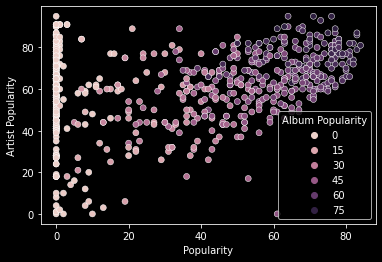

In [142]:
sns.scatterplot(x = "Popularity", y = "Artist Popularity", data = features, hue="Album Popularity")

<AxesSubplot:xlabel='Popularity', ylabel='Artist Followers'>

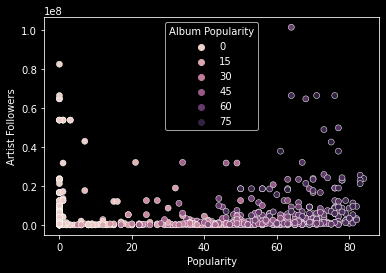

In [141]:
sns.scatterplot(x = "Popularity", y = "Artist Followers", data = features, hue="Album Popularity")

In [58]:
print("Most Popular (90+) Artists performs genre: \n")
print(features[features["Artist Popularity"]>90][["Artist Genre 1", "Artist Genre 2", "Artist Genre 3"]])

Most Popular (90+) Artist performs genre: 

                Artist Genre 1   Artist Genre 2 Artist Genre 3
95                       k-pop  k-pop boy group           None
114                      k-pop  k-pop boy group           None
138                      k-pop  k-pop boy group           None
146                      k-pop  k-pop boy group           None
151                      k-pop  k-pop boy group           None
152                      k-pop  k-pop boy group           None
153                      k-pop  k-pop boy group           None
154                      k-pop  k-pop boy group           None
522                       None             None           None
544                       None             None           None
570                       None             None           None
636  canadian contemporary r&b     canadian pop            pop
638                       None             None           None


We deduce from that, k-pop is the top genre for the most popular artists. 

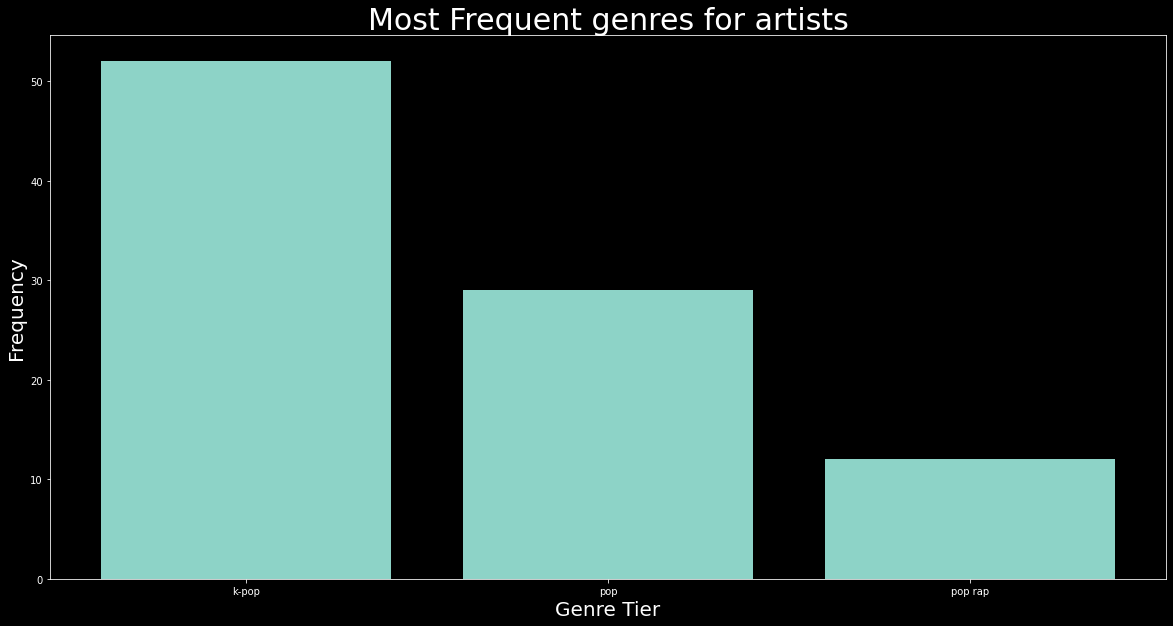

In [133]:
genre_name = [features["Artist Genre 1"].describe()["top"], features["Artist Genre 2"].describe()["top"], features["Artist Genre 3"].describe()["top"]]
genre_freq = [features["Artist Genre 1"].describe()["freq"], features["Artist Genre 2"].describe()["freq"], features["Artist Genre 3"].describe()["freq"]]

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))    
plt.style.use('dark_background')

ax.set_title("Most Frequent genres for artists", size=30)
ax.set_xlabel("Genre Tier", size=20)
ax.set_ylabel("Frequency", size=20)
plt.bar(genre_name, genre_freq)
plt.show()


In [87]:
x_features = features[["Acousticness", "Danceability", "Energy", "Instrumentalness", "Liveness", "Loudness", "Speechiness", "Tempo", "Valence"]]
x_features

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence
0,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,0.810
1,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,0.924
2,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,0.701
3,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,0.817
4,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,0.654
...,...,...,...,...,...,...,...,...,...
694,0.37800,0.559,0.552,0.747000,0.1350,-11.645,0.0398,121.994,0.311
695,0.00124,0.761,0.715,0.409000,0.1240,-7.520,0.2330,94.989,0.366
696,0.44200,0.614,0.833,0.934000,0.0923,-9.209,0.0297,164.717,0.469
697,0.05350,0.727,0.831,0.132000,0.0566,-5.553,0.0371,101.789,0.693


In [101]:
y_features = features["Popularity"]
y_features

0      67
1      81
2      21
3      76
4       0
       ..
694     8
695     0
696     0
697    43
698    52
Name: Popularity, Length: 699, dtype: int64

<AxesSubplot:>

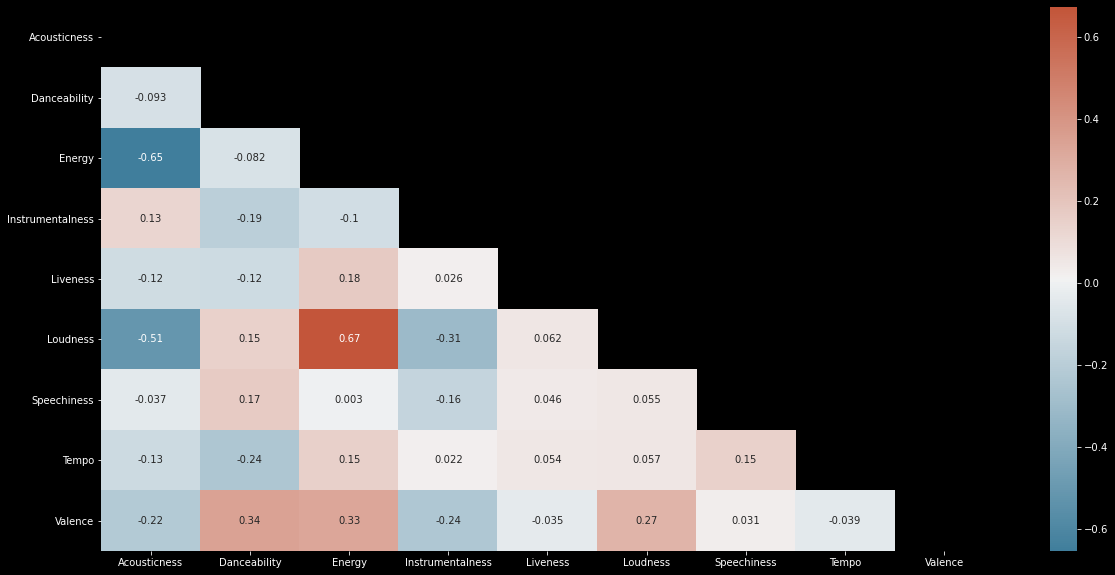

In [140]:
corr = x_features.corr()

# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))

# Generate a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

The most features that are correlated with each other are:
- Loudness & Energy (+ve)
- Loudness & Acousticness (-ve)
- Acousticness & Energy (-ve)

We can see that high valence (Happy tracks) have high:
- Danceability, Energy, Loudness
While low valence (Sad tracks) have high:
- Acousticness

Instrumentalness tracks have high:
- Acousticness
And low:
- Danceability
- Energy
- Valence
- Speechiness
- Loudness

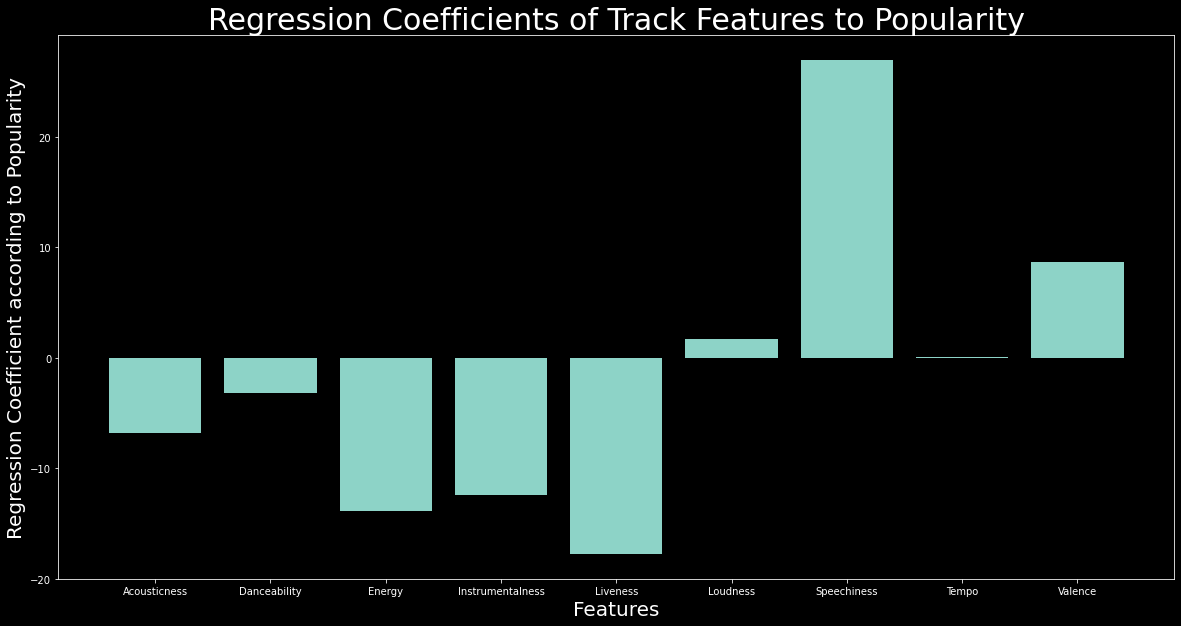

In [143]:
# Create a linear regression object
reg = LinearRegression()

# Fit a multivariate linear regression model
reg.fit(x_features, y_features)

# Retrieve the regression coefficients
col_names = []
col_reg = []
for i in range(x_features.shape[1]):
    col_names.append(x_features.columns[i])
    col_reg.append(reg.coef_[i])

    
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 10))    

ax.set_title("Regression Coefficients of Track Features to Popularity", size=30)
ax.set_xlabel("Features", size=20)
ax.set_ylabel("Regression Coefficient according to Popularity", size=20)
plt.bar(col_names, col_reg)
plt.show()

We can deduce that Popular track characteristics are:
- High Speechiness
- Low Liveness
- Low Energy
- Low Instrumentalness

The cumulative variance of the first two principal components is 0.58505


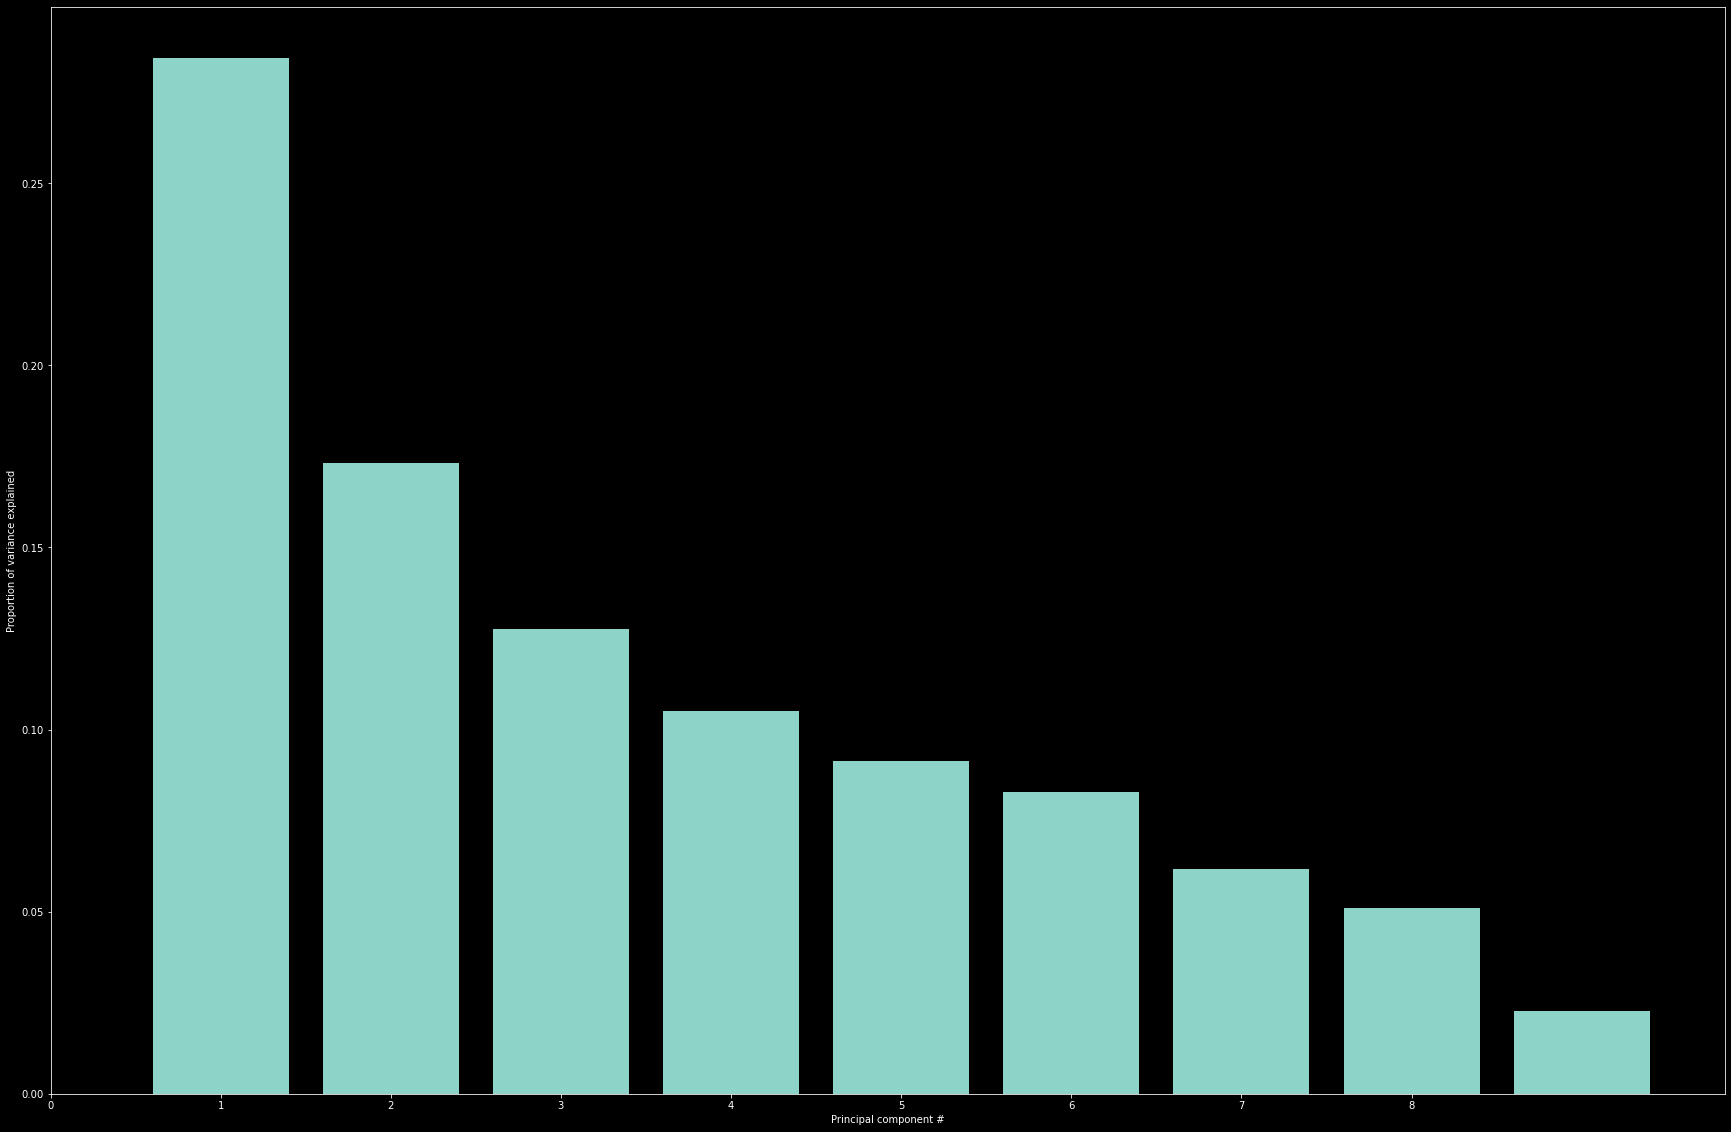

In [149]:
# Standardize and center the feature columns
scaler = StandardScaler()
features_scaled = scaler.fit_transform(x_features)

# Perform PCA to make dimensionality reduction 
pca = PCA()

# Fit the standardized data to the pca
pca=pca.fit(features_scaled)

# Plot the proportion of variance explained on the y-axis of the bar plot
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(30, 20))
plt.bar(range(1, pca.n_components_ + 1),  pca.explained_variance_ratio_)
plt.xlabel('Principal component #')
plt.ylabel('Proportion of variance explained')
plt.xticks(range(x_features.shape[1]))

# Compute the cumulative proportion of variance explained by the first two principal components
two_first_comp_var_exp = pca.explained_variance_ratio_.cumsum()[2]
print("The cumulative variance of the first two principal components is {}".format(
    round(two_first_comp_var_exp, 5)))

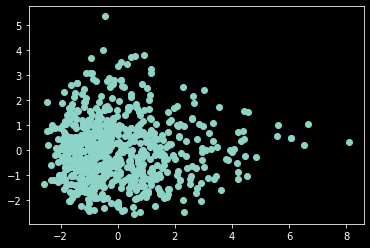

In [137]:
# Transform the scaled features using two principal components
pca = PCA(n_components=2)
p_comps = pca.fit_transform(features_scaled)

# Plot the first two principal components in a scatter plot
plt.scatter(p_comps[:,0],p_comps[:,1])

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:03<00:00,  2.89it/s]


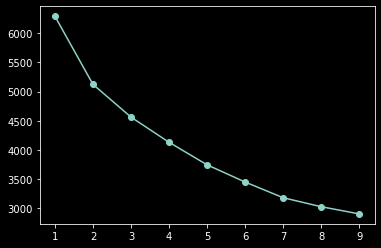

In [139]:
# A loop will be used to plot the explanatory power for up to 10 KMeans clusters
ks = range(1, 10)
inertias = []
for k in tqdm(ks):
    # Initialize the KMeans object using the current number of clusters (k)
    km = KMeans(n_clusters=k, random_state=8)
    # Fit the scaled features to the KMeans object
    km.fit(features_scaled)
    # Append the inertia for `km` to the list of inertias
    inertias.append(km.inertia_)
    
# Plot the results in a line plot
plt.plot(ks, inertias, marker='o')

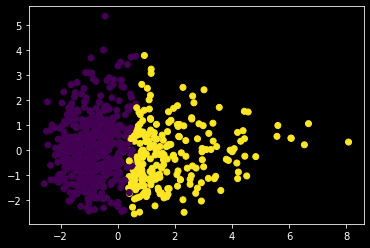

In [152]:
# Create a KMeans object with 3 clusters, use random_state=8 
km = KMeans(n_clusters=2,random_state=8)

# Fit the data to the `km` object
km=km.fit(features_scaled)

# Create a scatter plot of the first two principal components
plt.scatter(p_comps[:,0],p_comps[:,1],c=km.labels_)
# and color it according to the KMeans cluster assignment 

In [166]:
# Create a new column with the labels from the KMeans clustering
x_features['Cluster'] = km.labels_
x_features

,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Valence,Cluster
0,0.03110,0.904,0.813,0.006970,0.0471,-7.105,0.1210,125.461,0.810,0
1,0.02490,0.774,0.838,0.025000,0.2420,-3.914,0.1140,143.040,0.924,0
2,0.00238,0.664,0.758,0.000000,0.0598,-6.583,0.2100,99.259,0.701,0
3,0.20100,0.892,0.714,0.000234,0.0521,-6.055,0.1410,100.972,0.817,0
4,0.05610,0.853,0.606,0.000000,0.3130,-4.596,0.0713,94.759,0.654,0
...,...,...,...,...,...,...,...,...,...,...
694,0.37800,0.559,0.552,0.747000,0.1350,-11.645,0.0398,121.994,0.311,1
695,0.00124,0.761,0.715,0.409000,0.1240,-7.520,0.2330,94.989,0.366,0
696,0.44200,0.614,0.833,0.934000,0.0923,-9.209,0.0297,164.717,0.469,1
697,0.05350,0.727,0.831,0.132000,0.0566,-5.553,0.0371,101.789,0.693,0
